In [75]:
# If using Google Colab, install the dependencies
# !pip install --upgrade numpy scipy matplotlib pandas seaborn scikit-learn umap-learn

In [76]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data loading & exploration
We will use the digits dataset, starting by loading data from sklearn and running some visualization.

In [77]:
from sklearn.datasets import load_digits
digits = load_digits()

In [78]:
digits.data.shape

(1797, 64)

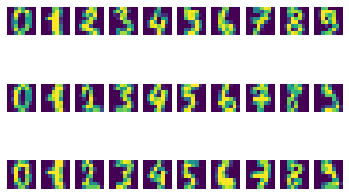

In [79]:
fig, axes = plt.subplots(3, 10)
axes_it = iter(axes.flatten())
for it, ax in enumerate(axes_it):
    ax.imshow(digits.data[it, :].reshape((8, 8)))
    ax.axis("off")

In [80]:
X, y = digits.data, digits.target

### Trying PCA on the dataset

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# normalize
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# doing the PCA
pca = PCA(svd_solver='full')
pca.fit(X_norm)

# transformed features
X_pred = pca.transform(X_norm)

[Text(0.5, 0, 'PC1'), Text(0, 0.5, 'PC2')]

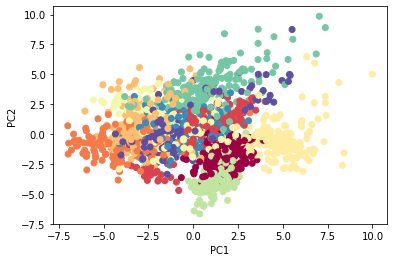

In [82]:
fig, ax = plt.subplots()
ax.scatter(X_pred[:, 0], X_pred[:, 1], c=y, cmap=plt.cm.Spectral)
ax.set(xlabel="PC1", ylabel="PC2")

### Trying spectral embedding on the dataset

In [83]:
from sklearn.manifold import SpectralEmbedding
se = SpectralEmbedding(n_components=2, n_neighbors=10)
se_digits_pred = se.fit_transform(X)

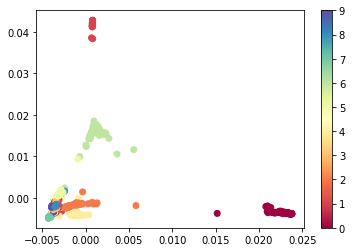

In [84]:
fig, ax = plt.subplots()
im = ax.scatter(se_digits_pred[:, 0], se_digits_pred[:, 1], c=y, cmap=plt.cm.Spectral)
plt.colorbar(im)

## tSNE

In [85]:
from sklearn.manifold import TSNE
tsne_digits = TSNE(n_components=2)
tsne_digits_embedded = tsne_digits.fit_transform(X)

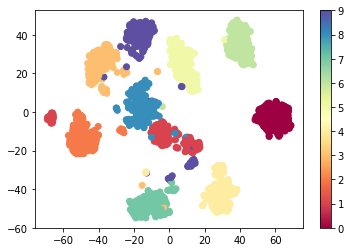

In [86]:
fig, ax = plt.subplots()
im = ax.scatter(tsne_digits_embedded[:, 0], tsne_digits_embedded[:, 1], c=y, cmap=plt.cm.Spectral)
plt.colorbar(im)

## UMAP

In [87]:
from umap import UMAP
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, stratify=digits.target, random_state=42)

In [89]:
umap = UMAP(n_neighbors=5, random_state=42)
umap.fit(X_train)

UMAP(dens_frac=0.0, dens_lambda=0.0, n_neighbors=5, random_state=42)

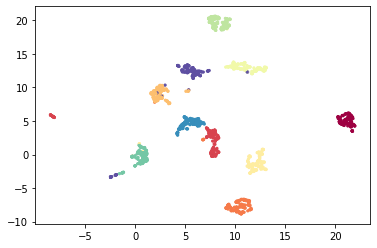

In [90]:
plt.scatter(umap.embedding_[:, 0], umap.embedding_[:, 1], s= 5, c=y_train, cmap=plt.cm.Spectral)

### Embed new data

In [91]:
X_test_embedding = umap.transform(X_test)

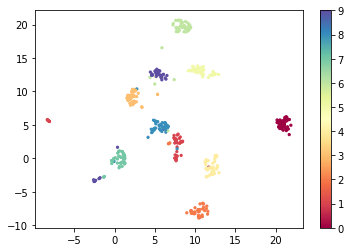

In [92]:
plt.scatter(X_test_embedding[:, 0], X_test_embedding[:, 1], s= 5, c=y_test, cmap=plt.cm.Spectral)
plt.colorbar()

### Inverse transform

https://umap-learn.readthedocs.io/en/latest/inverse_transform.html

In [93]:
corners = np.array([
    [-3, -3],
    [5, 13],
    [10, -10],
    [10, 15],
])

test_pts = np.array([
    (corners[0]*(1-x) + corners[1]*x)*(1-y) +
    (corners[2]*(1-x) + corners[3]*x)*y
    for y in np.linspace(0, 1, 10)
    for x in np.linspace(0, 1, 10)
])

In [94]:
inv_transformed_points = umap.inverse_transform(test_pts)

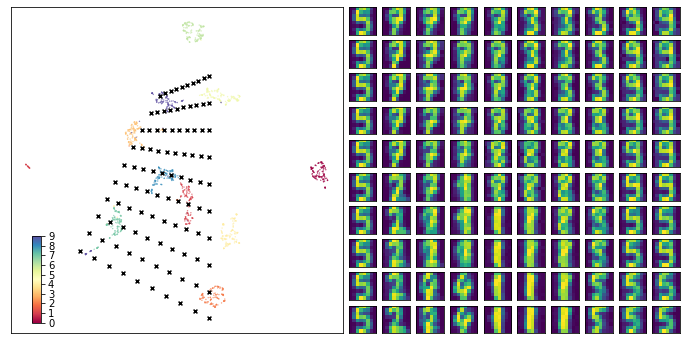

In [95]:
from matplotlib.gridspec import GridSpec
# Set up the grid
fig = plt.figure(figsize=(12,6))
gs = GridSpec(10, 20, fig)
scatter_ax = fig.add_subplot(gs[:, :10])
digit_axes = np.zeros((10, 10), dtype=object)
for i in range(10):
    for j in range(10):
        digit_axes[i, j] = fig.add_subplot(gs[i, 10 + j])

# Use umap.plot to plot to the major axis
# umap.plot.points(mapper, labels=labels, ax=scatter_ax)
im = scatter_ax.scatter(umap.embedding_[:, 0], umap.embedding_[:, 1],
                        c=y_train.astype(np.int32), cmap='Spectral', s=0.1)
scatter_ax.set(xticks=[], yticks=[])
cax = fig.add_axes([0.15, 0.15, 0.01, 0.2])
cbar = fig.colorbar(im, cax=cax) 
cbar.set_ticks(range(10))

# Plot the locations of the text points
scatter_ax.scatter(test_pts[:, 0], test_pts[:, 1], marker='x', c='k', s=15)

# Plot each of the generated digit images
for i in range(10):
    for j in range(10):
        digit_axes[i, j].imshow(inv_transformed_points[i*10 + j].reshape(8, 8))
        digit_axes[i, j].set(xticks=[], yticks=[])